The Goal of the task is to develop a predictive model that can estimate the price of a ride based on various input features including the number of available riders, the category of the location, the loyalty status of the customer, the number of past rides, the average ratings, the time of booking, the type of vehicle, and the expected duration of the ride. To achieve this, we will utilize historical data from a dataset comprising information from the last 1000 rides.

In [43]:
import pandas as pd #importing the pandas. Pandas are commonly used for data maipulation and analysis
import warnings
warnings.filterwarnings("ignore") # To avoid warning messages
df=pd.read_csv("d:/Kaggle/archive/dynamic_pricing.csv") #Calling the Csv file from the directory and saves the data into df.

In [44]:
df.head() # Display the first few rows of the dataset

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


In [45]:
df.tail() # display the last few rows of the dataset

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
995,33,23,Urban,Gold,24,4.21,Morning,Premium,11,91.389526
996,84,29,Urban,Regular,92,4.55,Morning,Premium,94,424.155987
997,44,6,Suburban,Gold,80,4.13,Night,Premium,40,157.364830
998,53,27,Suburban,Regular,78,3.63,Night,Premium,58,279.095048
999,78,63,Rural,Gold,14,4.21,Afternoon,Economy,147,655.065106


In [46]:
df.shape # provides clarity regarding the number of rows and columns present in the dataset. Where in our dataset contains 1000 rows and 10 columns.

(1000, 10)

In [47]:
df.duplicated().sum() #This code computes the number of duplicated rows in the DataFrame 'df'

0

In [48]:
df.isna().sum() #Finding any null values in the dataset. where we can identify that there are no null values.

Number_of_Riders           0
Number_of_Drivers          0
Location_Category          0
Customer_Loyalty_Status    0
Number_of_Past_Rides       0
Average_Ratings            0
Time_of_Booking            0
Vehicle_Type               0
Expected_Ride_Duration     0
Historical_Cost_of_Ride    0
dtype: int64

In [49]:
df["Number_of_Riders"].describe() # describes about the column . Where we mainly min and max of the column min=20, max=100

count    1000.000000
mean       60.372000
std        23.701506
min        20.000000
25%        40.000000
50%        60.000000
75%        81.000000
max       100.000000
Name: Number_of_Riders, dtype: float64

In [50]:
df["Number_of_Drivers"].describe() # From the dataset we can find that, what is the maximum and minimum drivers are available 

count    1000.000000
mean       27.076000
std        19.068346
min         5.000000
25%        11.000000
50%        22.000000
75%        38.000000
max        89.000000
Name: Number_of_Drivers, dtype: float64

In [51]:
print(df["Location_Category"].describe())# Tells that have 3 varies locations Urban, Suburban, Rural.
df["Location_Category"].unique()#Extracts the uniwue values in the columns. Have 3 columns Urban, Suburban, and Rural. 

count      1000
unique        3
top       Urban
freq        346
Name: Location_Category, dtype: object


array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [52]:
print(df["Customer_Loyalty_Status"].describe())# It describes that silver rows have the height
df["Customer_Loyalty_Status"].unique()#Extracts the uniwue values in the columns. Have 3 columns Silver, Regular, and Gold.

count       1000
unique         3
top       Silver
freq         367
Name: Customer_Loyalty_Status, dtype: object


array(['Silver', 'Regular', 'Gold'], dtype=object)

In [53]:
df["Number_of_Past_Rides"].describe() #It describes that how many past rides have been done. Minimum was 0 rides and highest was the 100 rides.

count    1000.000000
mean       50.031000
std        29.313774
min         0.000000
25%        25.000000
50%        51.000000
75%        75.000000
max       100.000000
Name: Number_of_Past_Rides, dtype: float64

In [54]:
df["Average_Ratings"].describe()

count    1000.000000
mean        4.257220
std         0.435781
min         3.500000
25%         3.870000
50%         4.270000
75%         4.632500
max         5.000000
Name: Average_Ratings, dtype: float64

In [55]:
print(df["Time_of_Booking"].describe()) #Extracts the unique values in the columns. Have 4 unique values Night, Evening, Afternoon, Morning. We can night rows have the highest.
df["Time_of_Booking"].unique()

count      1000
unique        4
top       Night
freq        276
Name: Time_of_Booking, dtype: object


array(['Night', 'Evening', 'Afternoon', 'Morning'], dtype=object)

In [56]:
print(df["Vehicle_Type"].describe())
df["Vehicle_Type"].unique() #Have 3 types of vehicle(premium and Economy)

count        1000
unique          2
top       Premium
freq          522
Name: Vehicle_Type, dtype: object


array(['Premium', 'Economy'], dtype=object)

In [57]:
df["Expected_Ride_Duration"].describe()# Minimum expected ride duration is 10 mins and maximum ride duration is 180

count    1000.00000
mean       99.58800
std        49.16545
min        10.00000
25%        59.75000
50%       102.00000
75%       143.00000
max       180.00000
Name: Expected_Ride_Duration, dtype: float64

In [58]:
df["Historical_Cost_of_Ride"].describe() #least price of the ride is 25 and highest ride of the cost id 836

count    1000.000000
mean      372.502623
std       187.158756
min        25.993449
25%       221.365202
50%       362.019426
75%       510.497504
max       836.116419
Name: Historical_Cost_of_Ride, dtype: float64

Axes(0.125,0.11;0.775x0.77)


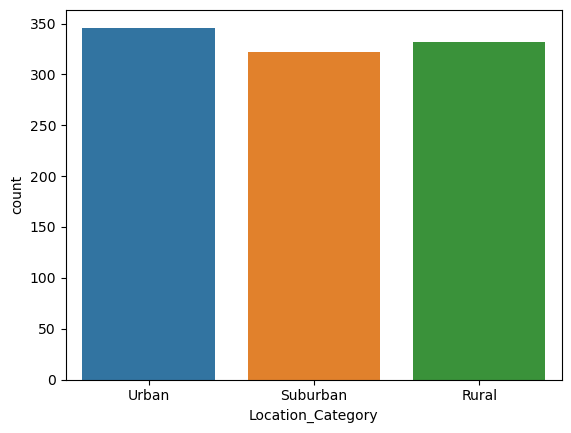

In [59]:
import seaborn as sns
print(sns.countplot(x="Location_Category", data=df)) #seaborn package is useful to display the statistical graph count

Axes(0.125,0.11;0.775x0.77)


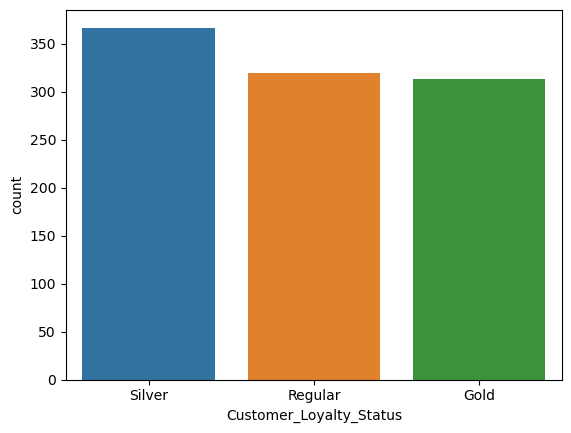

In [60]:
import seaborn as sns
print(sns.countplot(x="Customer_Loyalty_Status", data=df))

Axes(0.125,0.11;0.775x0.77)


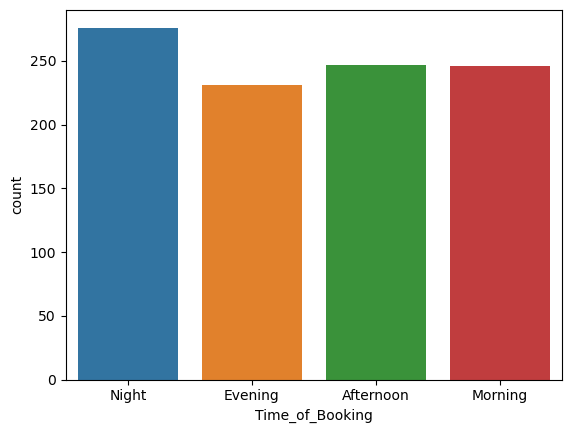

In [61]:
import seaborn as sns
print(sns.countplot(x="Time_of_Booking", data=df))

In [62]:
df.describe()

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502623
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158756
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.993449
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.365202
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.019426
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.497504
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.116419


In [63]:
df1=df.copy() # A deep copy means that a new DataFrame is created with the same data and indices as the original DataFrame 

In [64]:
from sklearn.preprocessing import LabelEncoder #This method fits the encoder to the unique values of the column and then transforms the values into integer labels.
import numpy as np
Le=LabelEncoder()
df1["Vehicle_Type"]=Le.fit_transform(df1["Vehicle_Type"])
df1["Location_Category"]=Le.fit_transform(df1["Location_Category"])
df1["Customer_Loyalty_Status"]=Le.fit_transform(df1["Customer_Loyalty_Status"])
df1["Time_of_Booking"]=Le.fit_transform(df1["Time_of_Booking"])
df1

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,2,2,13,4.47,3,1,90,284.257273
1,58,39,1,2,72,4.06,1,0,43,173.874753
2,42,31,0,2,0,3.99,0,1,76,329.795469
3,89,28,0,1,67,4.31,0,1,134,470.201232
4,78,22,0,1,74,3.77,0,0,149,579.681422
...,...,...,...,...,...,...,...,...,...,...
995,33,23,2,0,24,4.21,2,1,11,91.389526
996,84,29,2,1,92,4.55,2,1,94,424.155987
997,44,6,1,0,80,4.13,3,1,40,157.364830
998,53,27,1,1,78,3.63,3,1,58,279.095048


<Axes: >

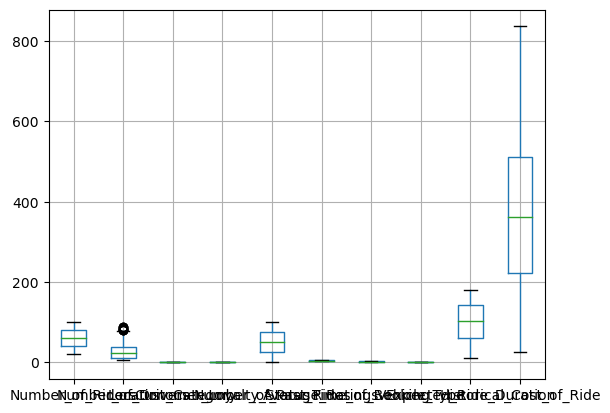

In [65]:
df1.boxplot() #By visualizing the box plots, you can quickly identify the spread of the data, the presence of outliers.

<Axes: >

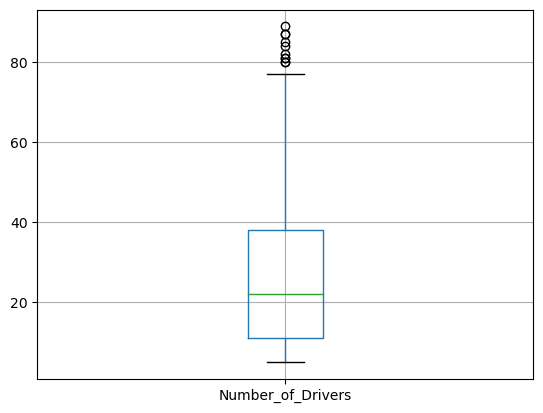

In [66]:
df1.boxplot(column="Number_of_Drivers") #we can identify that column=Number_of_Drivers have lot of outliers To overcome this we need to remove that are replace with average numers.

In [67]:
Q1 = df1['Number_of_Drivers'].quantile(0.25)
Q3 = df1['Number_of_Drivers'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df1[(df1['Number_of_Drivers'] < lower_bound) | (df1['Number_of_Drivers'] > upper_bound)]
print(outliers)
outliers.shape
print(upper_bound) #identifying the upper bond of outliers.

     Number_of_Riders  Number_of_Drivers  Location_Category  \
42                 97                 81                  1   
53                 95                 84                  1   
140                91                 80                  0   
294                96                 80                  2   
663                98                 87                  2   
734                91                 81                  0   
821                99                 89                  2   
823               100                 85                  1   
876                98                 87                  1   
946                94                 82                  1   

     Customer_Loyalty_Status  Number_of_Past_Rides  Average_Ratings  \
42                         1                    52             4.56   
53                         0                    18             3.86   
140                        0                    74             4.74   
294                   

In [68]:
for index, row in df1.iterrows():# Check if the value in the "Number_of_Drivers" column exceeds 78.5
    if row["Number_of_Drivers"] >= 75:# If the condition is met, delete the row using the drop method
        df1.drop(index, inplace=True) # Optionally, you can reset the index after deleting rows
df1.reset_index(drop=True, inplace=True)

In [69]:
df1.shape #We have removed 21 columns from the dataset

(979, 10)

<Axes: >

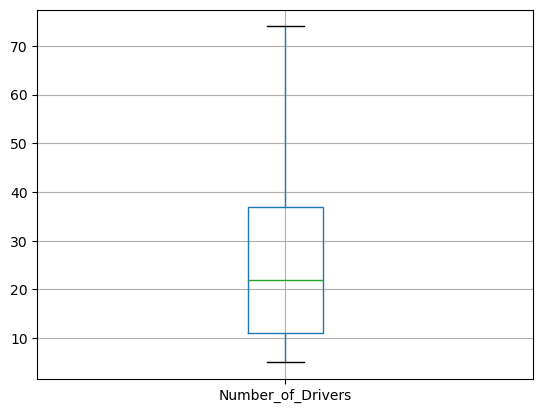

In [70]:
df1.boxplot(column="Number_of_Drivers")

In [71]:
X=df1.iloc[:,0:9] 
Y=df1["Historical_Cost_of_Ride"]
X.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration
0,90,45,2,2,13,4.47,3,1,90
1,58,39,1,2,72,4.06,1,0,43
2,42,31,0,2,0,3.99,0,1,76
3,89,28,0,1,67,4.31,0,1,134
4,78,22,0,1,74,3.77,0,0,149


array([[<Axes: title={'center': 'Number_of_Riders'}>,
        <Axes: title={'center': 'Number_of_Drivers'}>,
        <Axes: title={'center': 'Location_Category'}>],
       [<Axes: title={'center': 'Customer_Loyalty_Status'}>,
        <Axes: title={'center': 'Number_of_Past_Rides'}>,
        <Axes: title={'center': 'Average_Ratings'}>],
       [<Axes: title={'center': 'Time_of_Booking'}>,
        <Axes: title={'center': 'Vehicle_Type'}>,
        <Axes: title={'center': 'Expected_Ride_Duration'}>],
       [<Axes: title={'center': 'Historical_Cost_of_Ride'}>, <Axes: >,
        <Axes: >]], dtype=object)

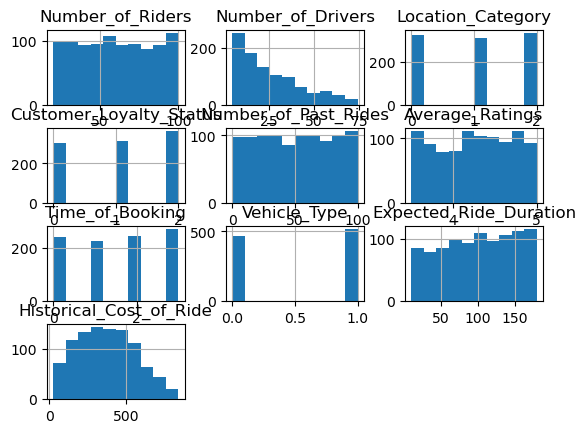

In [72]:
df1.hist() #from the histogram we can identify that skewness of the data

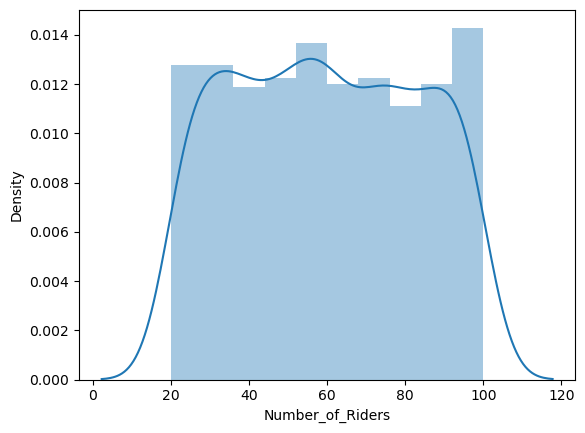

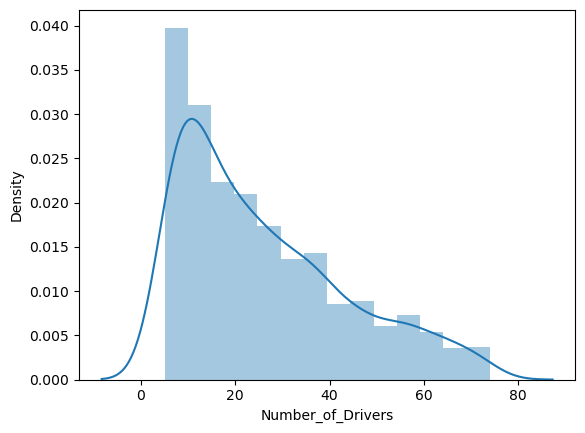

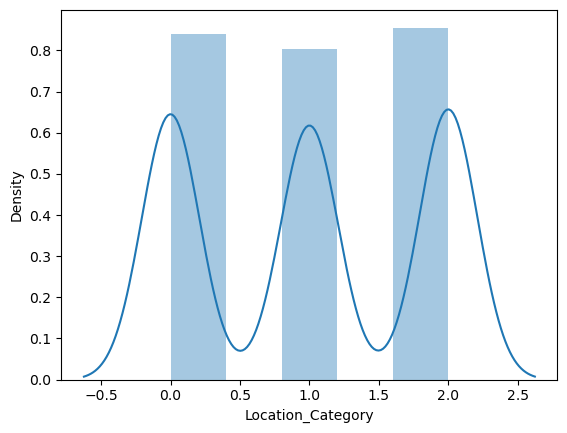

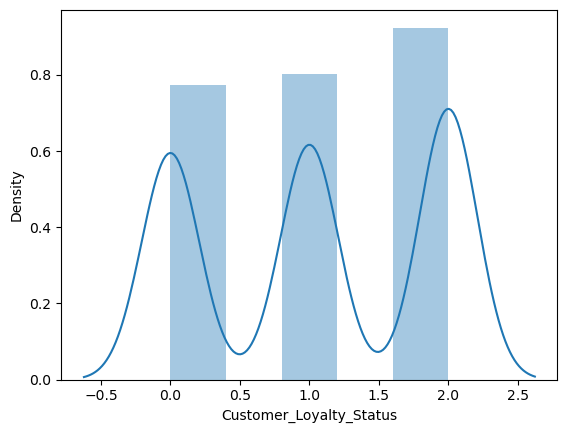

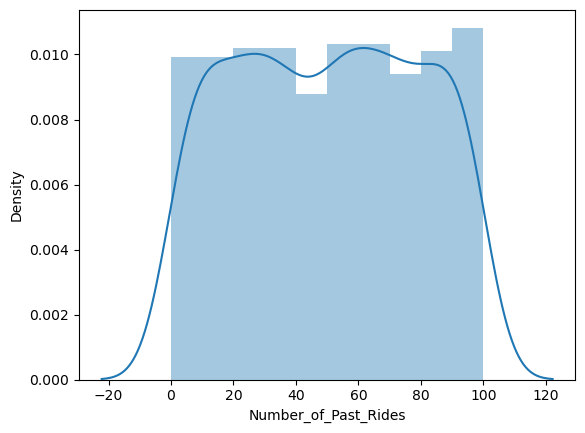

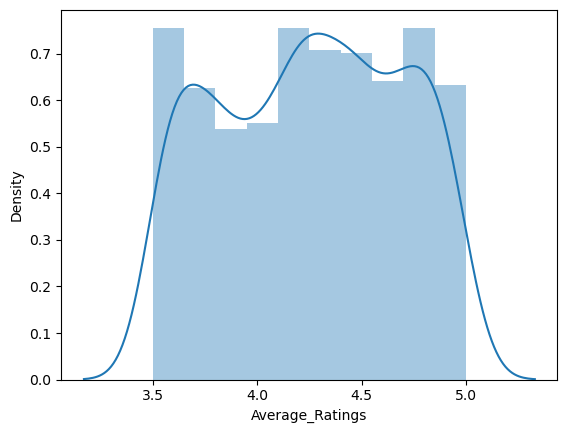

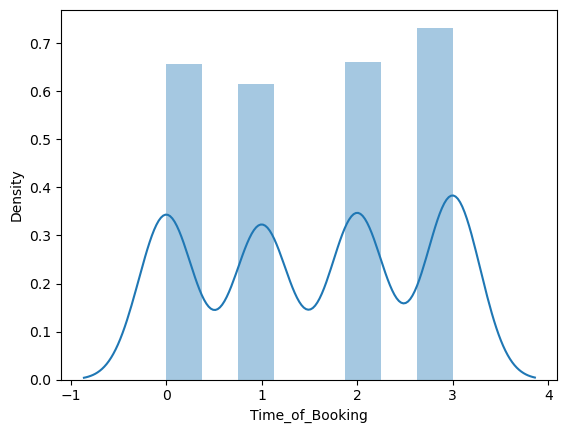

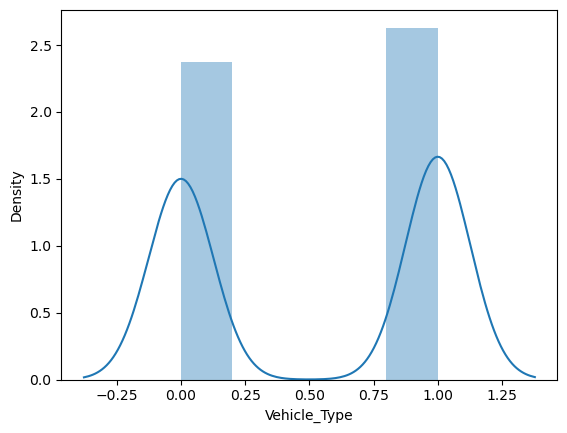

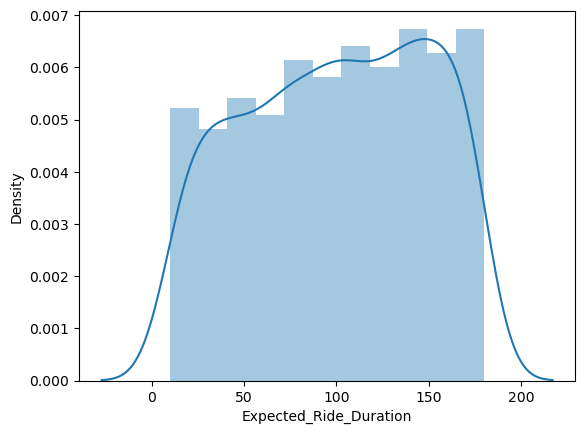

<Figure size 640x480 with 0 Axes>

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
for i in X:
    sns.distplot(X[i])
    plt.figure()

In [74]:
df1.corr() #correlation shows that how strong between the two variables

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
Number_of_Riders,1.000000,0.607762,0.037911,0.012307,0.026485,-0.007095,0.030227,0.009575,-0.009696,0.010569
Number_of_Drivers,0.607762,1.000000,0.043314,0.009228,0.036327,0.012627,-0.007969,0.040257,-0.010060,0.030842
Location_Category,0.037911,0.043314,1.000000,0.020580,0.045523,0.007542,0.041172,-0.012808,-0.038884,-0.038707
Customer_Loyalty_Status,0.012307,0.009228,0.020580,1.000000,0.035142,0.068430,-0.003878,0.004886,-0.043026,-0.031193
Number_of_Past_Rides,0.026485,0.036327,0.045523,0.035142,1.000000,-0.067394,0.062230,0.004358,0.026309,0.032289
Average_Ratings,-0.007095,0.012627,0.007542,0.068430,-0.067394,1.000000,-0.035279,0.004366,-0.018064,-0.002661
Time_of_Booking,0.030227,-0.007969,0.041172,-0.003878,0.062230,-0.035279,1.000000,-0.012729,-0.013772,-0.019710
Vehicle_Type,0.009575,0.040257,-0.012808,0.004886,0.004358,0.004366,-0.012729,1.000000,0.011152,0.133341
Expected_Ride_Duration,-0.009696,-0.010060,-0.038884,-0.043026,0.026309,-0.018064,-0.013772,0.011152,1.000000,0.926283
Historical_Cost_of_Ride,0.010569,0.030842,-0.038707,-0.031193,0.032289,-0.002661,-0.019710,0.133341,0.926283,1.000000


In [75]:
df1

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,2,2,13,4.47,3,1,90,284.257273
1,58,39,1,2,72,4.06,1,0,43,173.874753
2,42,31,0,2,0,3.99,0,1,76,329.795469
3,89,28,0,1,67,4.31,0,1,134,470.201232
4,78,22,0,1,74,3.77,0,0,149,579.681422
...,...,...,...,...,...,...,...,...,...,...
974,33,23,2,0,24,4.21,2,1,11,91.389526
975,84,29,2,1,92,4.55,2,1,94,424.155987
976,44,6,1,0,80,4.13,3,1,40,157.364830
977,53,27,1,1,78,3.63,3,1,58,279.095048


In [76]:
X1=df1.iloc[:,0:9]
Y1=df1["Historical_Cost_of_Ride"]
from sklearn.linear_model import LinearRegression # fitting and evaluation of a linear regression model, 
lr_1=LinearRegression()
lr_1.fit(X1,Y1)
lr_1.intercept_
lr_1.coef_
y_pred=lr_1.predict(X1)

from sklearn.metrics import mean_squared_error,r2_score #calculating the mean_squared error and r2 value
msc=mean_squared_error(Y1,y_pred)
print(msc.round(3))
print(np.sqrt(msc).round(3))
print("r square", r2_score(Y1,y_pred).round(3))
vif=1/(1-r2_score(Y1,y_pred).round(3))
vif

4351.38
65.965
r square 0.875


8.0

In [77]:
X1=df1.iloc[:,0:9]
Y1=df1["Historical_Cost_of_Ride"]
from sklearn.svm import SVR #fitting and evaluation of support vector regression to perform better model
lr_2=SVR()
lr_2.fit(X1,Y1)
y_pred=lr_1.predict(X1)
from sklearn.metrics import mean_squared_error,r2_score
msc=mean_squared_error(Y1,y_pred)
print(msc.round(3))
print(np.sqrt(msc).round(3))
print("r square", r2_score(Y1,y_pred).round(3))


4351.38
65.965
r square 0.875


In [78]:
from sklearn.model_selection import train_test_split

train_error = []
test_error = []
from sklearn.linear_model import LinearRegression
LR=LinearRegression() #splitting the data into train and test and checking how model is performing
from sklearn.model_selection import train_test_split

for i in range(1,300):
    X_train,X_test,Y_train,Y_test = train_test_split(X1,Y1, test_size=0.5, random_state=(i)) 
    LR = LinearRegression()
    LR.fit(X_train,Y_train)
    Y_pred_train = LR.predict(X_train)
    Y_pred_test = LR.predict(X_test)
    train_error.append(np.sqrt(mean_squared_error(Y_train,Y_pred_train)))
    test_error.append(np.sqrt(mean_squared_error(Y_test,Y_pred_test)))
print("root mean squared error ",np.mean(train_error))
print("root mean squared error ",np.mean(test_error))

root mean squared error  65.55570667033516
root mean squared error  67.01927032249222


In [79]:
import pickle
pickle.dump(lr_1,open("model_1.pkl","wb")) #saving the model to the model_1.pll

In [80]:
import pickle
pickle.dump(lr_2,open("model_2.pkl","wb"))

In [81]:
X1=df1.iloc[:,0:9]
Y1=df1["Historical_Cost_of_Ride"]
from sklearn.tree import DecisionTreeRegressor #To get better performance we need to check other models, where i have fitted decisionTree regressor
lr_4=DecisionTreeRegressor(max_depth=9)
lr_4.fit(X1,Y1)
y_pred=lr_4.predict(X1)
from sklearn.metrics import mean_squared_error,r2_score
msc=mean_squared_error(Y1,y_pred)
print(msc.round(3))
print(np.sqrt(msc).round(3))
print("r square", r2_score(Y1,y_pred).round(3))


1533.489
39.16
r square 0.956


In [82]:
import pickle
pickle.dump(lr_4,open("model_5.pkl","wb"))

In [83]:
X1=df1.iloc[:,0:9]
Y1=df1["Historical_Cost_of_Ride"]
#checking model fitting with gradient boosing regressor and adaboostregressor
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X1,Y1, test_size=0.50)
from sklearn.tree import DecisionTreeRegressor
DT=DecisionTreeRegressor(criterion="squared_error",max_depth=9)
DT.fit(X_train,Y_train)
Y_pred_train=DT.predict(X_train)
Y_pred_test=DT.predict(X_test)
from sklearn.metrics import mean_squared_error
msc=mean_squared_error(Y_train,Y_pred_train)
msc1=mean_squared_error(Y_test,Y_pred_test)
print(msc,msc1)
from sklearn.ensemble import GradientBoostingRegressor
GBR= GradientBoostingRegressor(learning_rate=0.02,n_estimators=100,max_features=0.5,random_state=42)
GBR.fit(X_train,Y_train)
Y_pred_train = GBR.predict(X_train)
Y_pred_test = GBR.predict(X_test)
from sklearn.metrics import mean_squared_error
print("Training msc :",np.sqrt(mean_squared_error(Y_train,Y_pred_train)).round(2))
print("Test msc:",np.sqrt(mean_squared_error(Y_test,Y_pred_test)).round(2))
from sklearn.ensemble import AdaBoostRegressor
ABR=AdaBoostRegressor(learning_rate=0.02,n_estimators=100,random_state=42)
ABR.fit(X_train,Y_train)
Y_pred_train=ABR.predict(X_train)
Y_pred_test=ABR.predict(X_test)
print("Training msc :",np.sqrt(mean_squared_error(Y_train,Y_pred_train).round(2)))
print("Test msc :",np.sqrt(mean_squared_error(Y_test,Y_pred_test).round(2)))


563.2268366166542 7618.764663030085


Training msc : 73.06
Test msc: 80.05
Training msc : 66.70359810385044
Test msc : 72.67234687279613


In [84]:
import pickle
pickle.dump(ABR,open("model_6.pkl","wb"))